In [1]:
import pandas as pd

In [2]:
file = 'Data/stock_prices.csv'
df = pd.read_csv(file)
df.head()

,Date,Closing Price
0,2010-01-04,30.950001
1,2010-01-05,30.959999
2,2010-01-06,30.770000
3,2010-01-07,30.450001
4,2010-01-08,30.660000


### Examining real world example of a random walk - daily stock prices

0) Convert the Date column to datetime dtype and make the index.

In [3]:
# fortunately 'Date' is already in datetime format. Converting dtype and making index.
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2010-01-04 to 2014-12-31
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Closing Price  1258 non-null   float64
dtypes: float64(1)
memory usage: 19.7 KB


In [4]:
df.head(3)

,Closing Price
Date,
2010-01-04,30.950001
2010-01-05,30.959999
2010-01-06,30.770000


1) Resample the data as business days "B".

In [5]:
# Making copy and resampling
r = df['Closing Price'].resample("B").asfreq()
r.name = 'Resampled'
r.head(10)

Date
2010-01-04    30.950001
2010-01-05    30.959999
2010-01-06    30.770000
2010-01-07    30.450001
2010-01-08    30.660000
2010-01-11    30.270000
2010-01-12    30.070000
2010-01-13    30.350000
2010-01-14    30.959999
2010-01-15    30.860001
Freq: B, Name: Resampled, dtype: float64

2) Check for missing values and impute if necessary. (for stock data, you should forward-fill the missing values).

In [6]:
# Checking nulls
r.isna().sum()

45

In [8]:
# Forward filling
r = r.fillna(method = 'ffill')
r.isna().sum()

0

3) Visualize the time series.

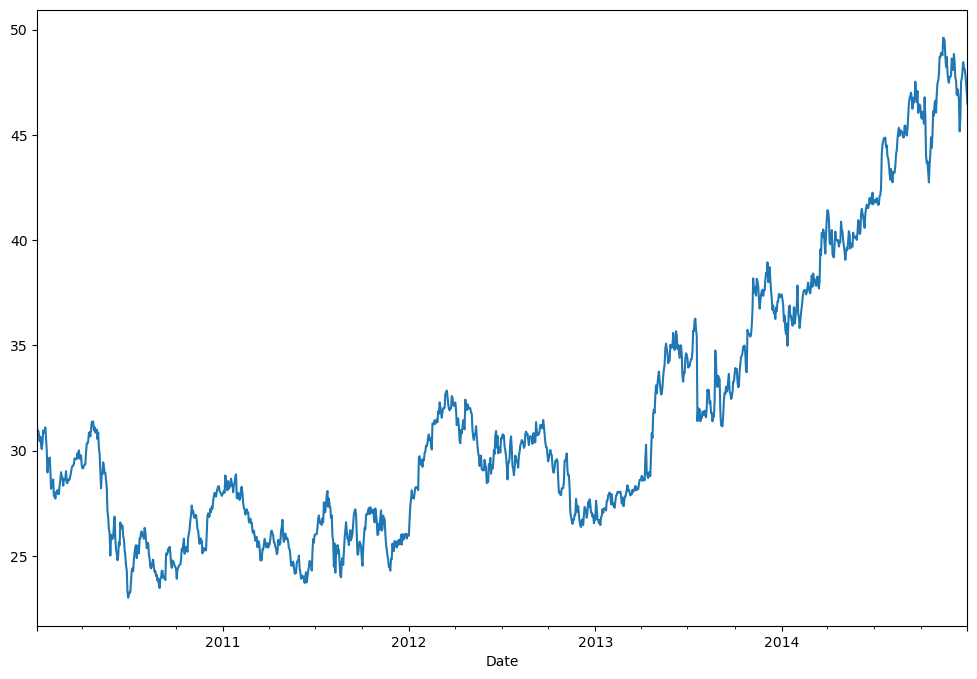

In [15]:
# Using matplotlib to make a long format for timeseries
import matplotlib.pyplot as plt
#set_config(transform_output="pandas")
plt.rcParams["figure.figsize"] = (12, 4)
# Making figure
r.plot(figsize = (12,8), subplots=True);

4) Check for stationarity with the Ad Fuller Test.

In [10]:
# Custom function for Ad Fuller Test
def get_adfuller_results(ts, alpha=.05, label='adfuller', **kwargs): #kwargs for adfuller()
    # Saving each output
    (test_stat, pval, nlags, nobs, crit_vals_d, 
    icbest ) = tsa.adfuller(ts, **kwargs)
    # Converting output to a dictionary with the interpretation of p
    adfuller_results = {'Test Statistic': test_stat,
                        "# of Lags Used":nlags, 
                       '# of Observations':nobs,
                        'p-value': round(pval,6),
                        'alpha': alpha,
                       'sig/stationary?': pval < alpha}
    return pd.DataFrame(adfuller_results, index =[label])

In [12]:
import  statsmodels.tsa.api as tsa # new import

In [13]:
# Now checking stationarity
results = get_adfuller_results(r, label = 'Closing Price')
results

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
Closing Price,-0.10329,0,1302,0.94911,0.05,False


##### Raw data is not stationary

5) Check for autocorrelation with an ACF plot.

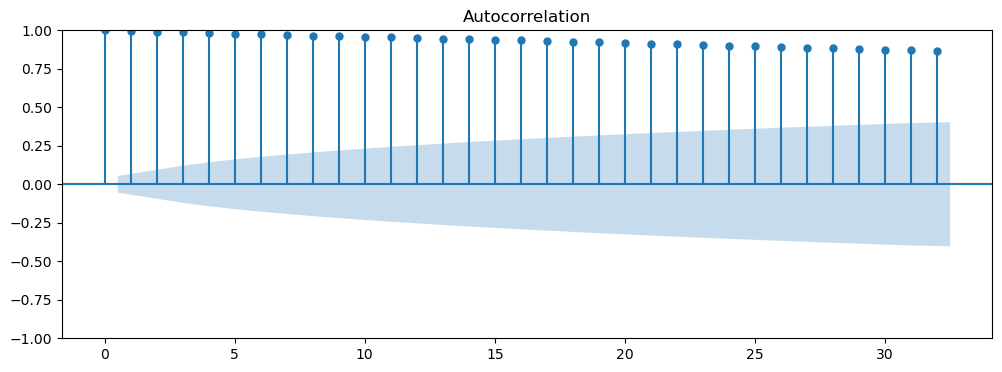

In [16]:
fig = tsa.graphics.plot_acf(r);

6) Difference the data once.

In [17]:
r_diff = r.diff().dropna()
r_diff.head()

Date
2010-01-05    0.009998
2010-01-06   -0.189999
2010-01-07   -0.320000
2010-01-08    0.209999
2010-01-11   -0.389999
Freq: B, Name: Resampled, dtype: float64

7) Visualize the differenced data.

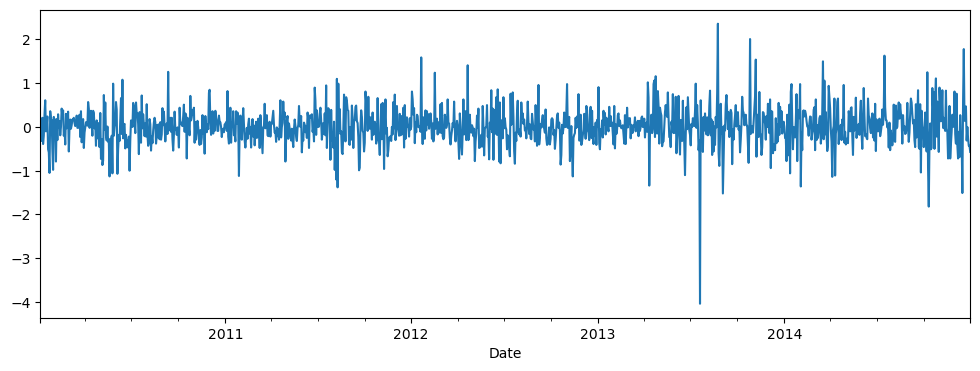

In [19]:
r_diff.plot();

8) Check the differenced data for stationarity with the Ad Fuller Test.

In [20]:
results = get_adfuller_results(r_diff, label='Differenced')
results

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
Differenced,-35.778578,0,1301,0.0,0.05,True


9) Check the differenced data for autocorrelation with an ACF Plot.

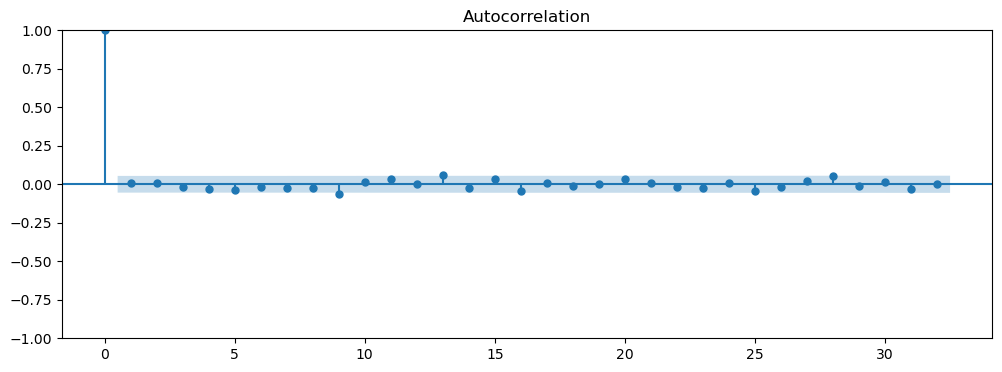

In [21]:
fig = tsa.graphics.plot_acf(r_diff);